In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import neattext.functions as nfx
    

import necessary models and transformars


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Loading the dataset

<AxesSubplot:xlabel='Emotion', ylabel='count'>

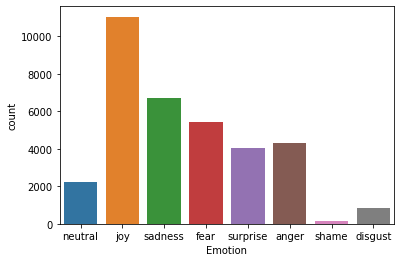

In [11]:
df=pd.read_csv("data/emotion_dataset_2.csv")
sns.countplot(x='Emotion', data=df)

Data Cleaning

In [17]:
dir(nfx)
# user Handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


Features and Labels

In [33]:
Xfeatures=df['Clean_Text']
ylabels=df['Emotion']
#train test split
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=41)

Building Pipeline

In [34]:
from sklearn.pipeline import Pipeline
# a simple Logistic Regression Pipeline
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

Train and Fit data in model

In [35]:
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

e:\personal\NLP project\emotion recognition\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.641471475786751

Save the model with pipeline

In [36]:
import joblib
pipeline_file=open('emotion_classifier_pipe_lr_03_jan_2022.pkl',"wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()